In [45]:
import os
import tarfile
import urllib.request
import pandas as pd

DOWNLOAD_ROOT = "https://github.com/ageron/data/raw/main/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    with tarfile.open(tgz_path) as housing_tgz:
        housing_tgz.extractall(path=housing_path)

fetch_housing_data()
df = pd.read_csv("datasets/housing/housing/housing.csv")


C:\Users\i7\AppData\Local\Temp\ipykernel_26024\3943399175.py:15: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
df.first

<bound method NDFrame.first of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  h

In [16]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [18]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [21]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [24]:
df.select_dtypes(include=['int64','float64']).columns
df.select_dtypes(include=['object']).columns

Index(['ocean_proximity'], dtype='object')

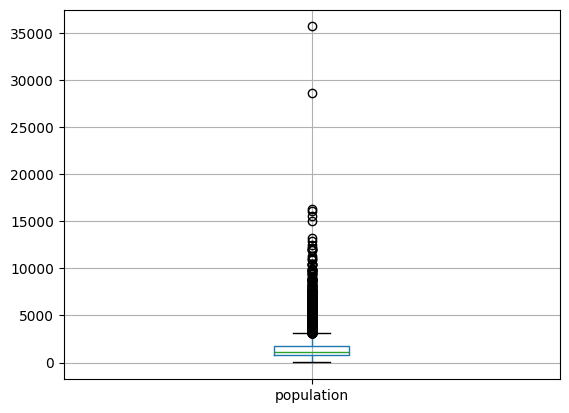

In [25]:
import matplotlib.pyplot as plt
df.boxplot(column='population')
plt.show()

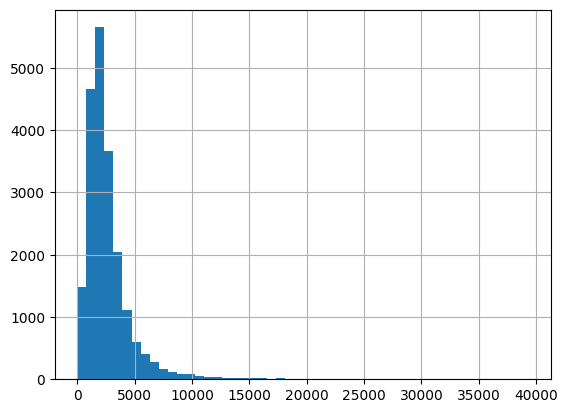

In [26]:
df['total_rooms'].hist(bins=50)
plt.show()

In [32]:
Q1=df['population'].quantile(0.25)
Q3=df['population'].quantile(0.75)
IQR=Q3-Q1
outliers=df[(df['population']<Q1-1.5*IQR)|(df['population']>Q3+1.5*IQR)]

print(outliers)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
95       -122.26     37.80                36.0       5329.0          2477.0   
117      -117.47     34.12                 6.0      10565.0          1767.0   
124      -117.91     33.75                 8.0       2346.0           679.0   
137      -119.19     34.15                31.0       4175.0          1004.0   
146      -122.51     38.06                24.0       9493.0          1935.0   
...          ...       ...                 ...          ...             ...   
20543    -121.74     38.55                33.0       6861.0          1820.0   
20544    -121.76     38.55                23.0       8800.0          1857.0   
20563    -121.75     38.67                 9.0      12139.0          2640.0   
20604    -121.54     39.12                17.0       4251.0           899.0   
20629    -121.39     39.12                28.0      10035.0          1856.0   

       population  households  median_income  media

In [43]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [51]:
median=df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median, inplace=True)

C:\Users\i7\AppData\Local\Temp\ipykernel_26024\1087590111.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(median, inplace=True)


In [61]:
def missing_report(df):
    missing_count=df.isna().sum()
    missing_percent=(missing_count/len(df))*100
    report=(
        pd.DataFrame({
            "column":missing_count.index,
            "missing_count": missing_count.values,
            "missing_percent":missing_percent.values
        })
        .query('missing_count>0')
        .reset_index(drop=True)
    )
    return report
missing_report(df)

,column,missing_count,missing_percent


In [57]:
pd.get_dummies(df['ocean_proximity']).astype(int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [59]:
ocean_encoded=pd.get_dummies(df['ocean_proximity'], dtype=int)

df_encoded=pd.concat(
    [df.drop('ocean_proximity', axis=1), ocean_encoded],
    axis=1

)
print(df_encoded)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [82]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_rooms_log,total_rooms_scaled,population_log,population_scaled,households_log,households_scaled,total_bedrooms_log,totat_bedrooms_scaled,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,20640.000000,2.064000e+04,20640.000000,2.064000e+04,20640.000000,2.064000e+04,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,7.629377,-1.035520e-15,7.025503,1.461708e-15,5.984702,7.704431e-16,6.054938,8.434252e-17,5.429000,0.213794,3.070655
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,0.749991,1.000024e+00,0.736238,1.000024e+00,0.726740,1.000024e+00,0.723078,1.000024e+00,2.474173,0.065248,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.098612,-8.708000e+00,1.386294,-7.659682e+00,0.693147,-7.281394e+00,0.693147,-7.415413e+00,0.846154,0.037151,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,7.278456,-4.679108e-01,6.669498,-4.835575e-01,5.638355,-4.765882e-01,5.697093,-4.949031e-01,4.440716,0.175225,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,7.662938,4.474966e-02,7.062192,4.983434e-02,6.016157,4.328334e-02,6.077642,3.139976e-02,5.229129,0.203159,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,8.054840,5.673050e-01,7.453562,5.814287e-01,6.406880,5.809338e-01,6.468087,5.713884e-01,6.052381,0.240126,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,10.579514,3.933658e+00,10.482430,4.695510e+00,8.713253,3.754597e+00,8.771215,3.756639e+00,141.909091,2.824675,1243.333333


In [70]:
import numpy as np
from sklearn.preprocessing import StandardScaler
df["total_rooms_log"]=np.log1p(df['total_rooms'])
scaler=StandardScaler()
df['total_rooms_scaled']=scaler.fit_transform(
    df[['total_rooms_log']]
)

df["population_log"]=np.log1p(df['population'])
scaler=StandardScaler()
df['population_scaled']=scaler.fit_transform(
    df[['population_log']]
)

df["households_log"]=np.log1p(df['households'])
scaler=StandardScaler()
df['households_scaled']=scaler.fit_transform(
    df[['households_log']]
)

df["total_bedrooms_log"]=np.log1p(df['total_bedrooms'])
scaler=StandardScaler()
df['totat_bedrooms_scaled']=scaler.fit_transform(
    df[['total_bedrooms_log']]
)

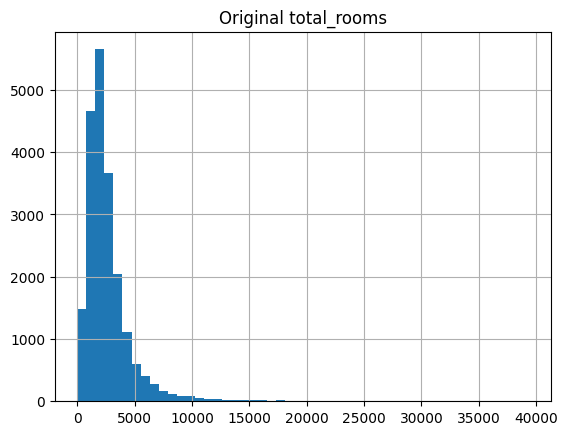

In [72]:
df['total_rooms'].hist(bins=50)
plt.title("Original total_rooms")
plt.show()

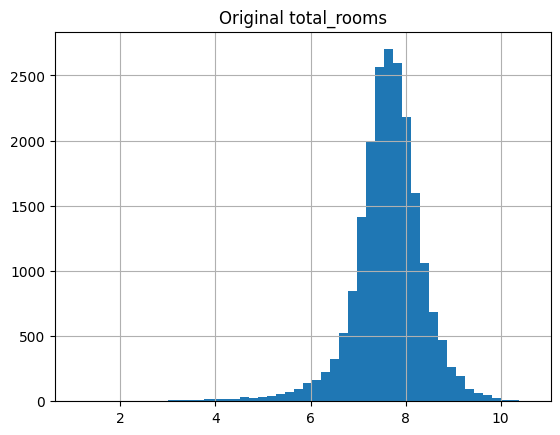

In [74]:
df['total_rooms_log'].hist(bins=50)
plt.title("Original total_rooms")
plt.show()

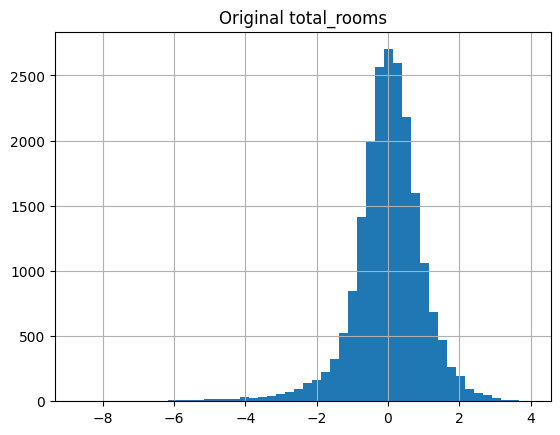

In [75]:
df['total_rooms_scaled'].hist(bins=50)
plt.title("Original total_rooms")
plt.show()

In [81]:
df['rooms_per_household']=df['total_rooms']/df['households']
df['bedrooms_per_room']=df['total_bedrooms']/df['total_rooms']
df['population_per_household']=df['population']/df['households']